In [8]:
from pathlib import Path 
import os
import torch.nn as nn
import matplotlib.pyplot as plt

In [9]:
data = "../data/data.yaml"


In [10]:
train_path = "../data/train"
val_path = "../data/valid"
test_path = "../data/test"

train_images = train_path + "/images"
val_images = val_path + "/images"
test_images = test_path + "/images"

train_labels = train_path + "/labels"
val_labels = val_path + "/labels"
test_labels = test_path + "/labels"




In [11]:
classes = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
idx_to_class = {i : k for i,k in enumerate(classes)}
class_to_idx = {k: i for i, k in idx_to_class.items()}


In [12]:
class_to_idx

{'fish': 0,
 'jellyfish': 1,
 'penguin': 2,
 'puffin': 3,
 'shark': 4,
 'starfish': 5,
 'stingray': 6}

In [13]:
class_to_idx

{'fish': 0,
 'jellyfish': 1,
 'penguin': 2,
 'puffin': 3,
 'shark': 4,
 'starfish': 5,
 'stingray': 6}

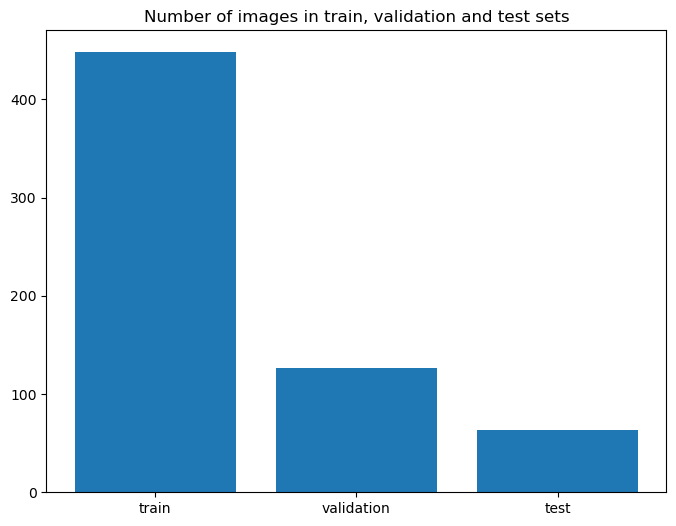

In [42]:
def plot_data(data: dict, title : str):
    plt.figure(figsize = (8,6))
    plt.bar(data.keys(), data.values())
    plt.title("Number of images in train, validation and test sets")
    plt.show()
    
def get_num_images(path):
    return len(os.listdir(path))

plot_data(data = {'train': get_num_images(train_images), "validation" : get_num_images(val_images), "test" : get_num_images(test_images)}, title = 
          "Number of images in train, test and val splits")  
    

In [24]:
def count_obj_per_split(image_dir, label_dir):
    object_count = {}
    total_object_count = []
    img_files = sorted(os.listdir(image_dir))
    for file in img_files: 
        label_path = os.path.join(label_dir,  file[:-4] + ".txt")
        f = open(label_path, "r")
        lines = f.readlines()
        total_object_count.append(len(lines))
        for line in lines: 
            object_count[(idx_to_class[int(line.split()[0])])] = object_count.get(idx_to_class[int(line.split()[0])], 0) + 1
        f.close()
    return object_count, total_object_count    



In [25]:
object_counts_train, total_train_objects = count_obj_per_split(train_images, train_labels)
object_counts_val, total_val_objects = count_obj_per_split(val_images, val_labels)
object_counts_test, total_test_objects = count_obj_per_split(test_images, test_labels)

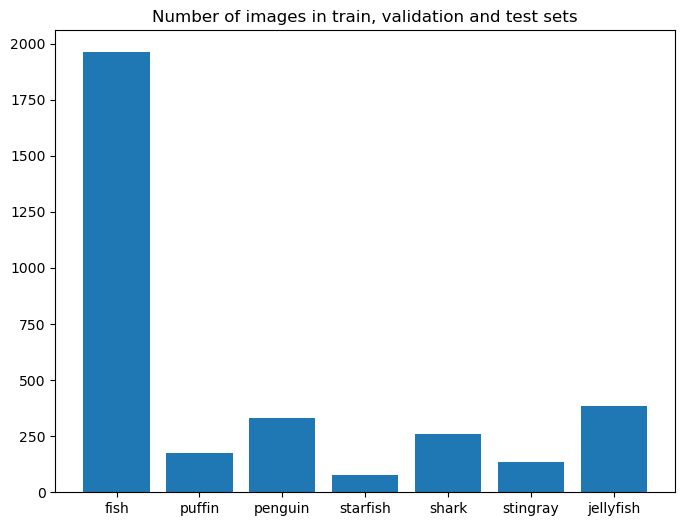

In [43]:
plot_data(object_counts_train, title = "Total instances of each class in training set")

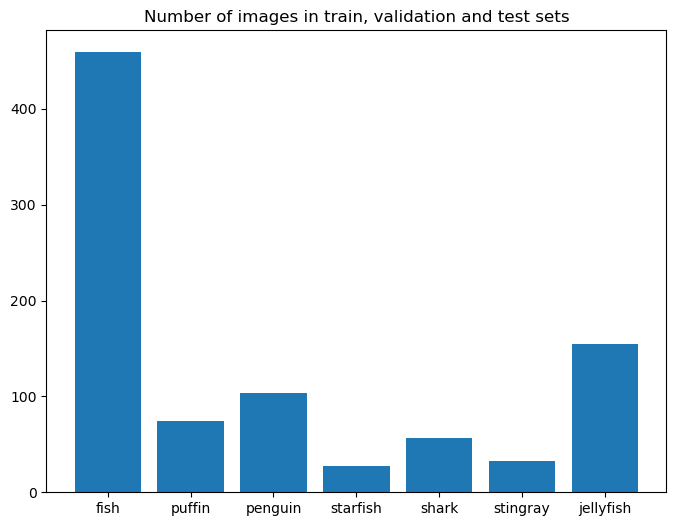

In [44]:
plot_data(object_counts_val, title = "Total instances of each class in validation set")

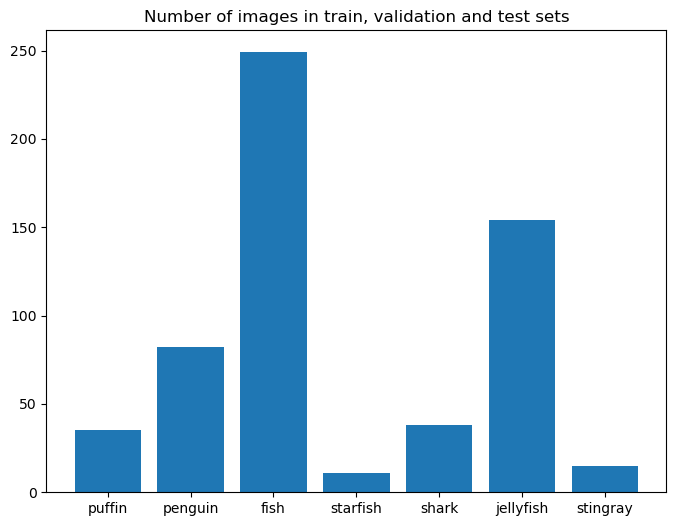

In [45]:
plot_data(object_counts_test, title = "Total instances of each class in test set")